In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [3]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [4]:
!pip install -q findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [6]:
import findspark
findspark.init()


In [7]:
from pyspark import SparkContext
sc =SparkContext.getOrCreate()

# **First file: Cars** 

In [8]:
rdd = sc.textFile("CARS-2.csv")
rdd.count()

118

In [9]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [10]:
df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("CARS-2.csv")


In [11]:
df.show(5)

+------------+-------+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+------------------+-------------+---------------+-------------+------------------+
|Manufacturer|  Model|Sales_in_thousands|__year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|       Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch| Power_perf_factor|
+------------+-------+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+------------------+-------------+---------------+-------------+------------------+
|       Acura|Integra|            16.919|              16.36|   Passenger|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|             2.639|         13.2|           28.0|     2/2/2012|       58.28014952|
|       Acura|     TL|            39.384|             19.875|   Passenger|              28.4|        3.2|     22

In [12]:
df.toPandas()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
3,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
4,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
113,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
114,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
115,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [ ]:
# How many rows we have
df.count()


117

In [ ]:
# The names of our columns
df.columns

['Manufacturer',
 'Model',
 'Sales_in_thousands',
 '__year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor']

In [ ]:
# Types of our columns
df.dtypes

[('Manufacturer', 'string'),
 ('Model', 'string'),
 ('Sales_in_thousands', 'double'),
 ('__year_resale_value', 'double'),
 ('Vehicle_type', 'string'),
 ('Price_in_thousands', 'double'),
 ('Engine_size', 'double'),
 ('Horsepower', 'double'),
 ('Wheelbase', 'double'),
 ('Width', 'double'),
 ('Length', 'double'),
 ('Curb_weight', 'double'),
 ('Fuel_capacity', 'double'),
 ('Fuel_efficiency', 'double'),
 ('Latest_Launch', 'string'),
 ('Power_perf_factor', 'double')]

In [ ]:
# Basics stats from our columns
df.describe().toPandas()


,summary,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,count,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
1,mean,None,None,59.112316239316236,18.031538461538464,None,25.969487179487164,3.0487179487179477,181.28205128205127,107.32649572649566,71.18974358974357,187.71794871794881,3.3240512820512813,17.81282051282051,24.11965811965812,None,74.93092069965812
2,stddev,None,None,75.05893322935277,11.605632187640666,None,14.149699362966485,1.0551691631509716,58.59178566557008,8.050587825640042,3.53015054420084,13.849926026097831,0.5971767318571763,3.7946091176085144,4.40446950338496,None,25.771796485379728
3,min,Acura,3000GT,0.11,5.16,Car,9.235,1.0,55.0,92.6,62.6,149.4,1.895,10.3,15.0,1/14/2012,23.27627233
4,max,Volkswagen,Wrangler,540.561,67.55,Passenger,82.6,8.0,450.0,138.7,79.3,224.5,5.115,32.0,45.0,9/3/2011,188.14432299999999


In [ ]:
from pyspark.sql.functions import col
dataset = df.select(
                         col('Sales_in_thousands').cast('float'),
                         col('Vehicle_type'),
                         col('Price_in_thousands').cast('float'),
                         col('Engine_size').cast('float'),
                         col('Horsepower').cast('float'),
                         col('Wheelbase').cast('float'),
                         col('Width').cast('float'),
                         col('Length').cast('float'),
                         col('Curb_weight').cast('float'),
                         col('Fuel_capacity').cast('float'),
                         col('Fuel_efficiency').cast('float'),
                         col('Power_perf_factor').cast('float')
                         
                        )
dataset.show()

+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+
|Sales_in_thousands|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Power_perf_factor|
+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+
|            16.919|   Passenger|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|      2.639|         13.2|           28.0|         58.28015|
|            39.384|   Passenger|              28.4|        3.2|     225.0|    108.1| 70.3| 192.9|      3.517|         17.2|           25.0|         91.37078|
|             8.588|   Passenger|              42.0|        3.5|     210.0|    114.6| 71.4| 196.6|       3.85|         18.0|           22.0|         91.38978|
|            20.397|   Passenger|             

In [ ]:
from pyspark.sql.functions import isnull, when, count, col
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+
|Sales_in_thousands|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Power_perf_factor|
+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+
|                 0|           0|                 0|          0|         0|        0|    0|     0|          0|            0|              0|                0|
+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+



We see that we don't have null values in columns

Now, the Spark ML library only works with numeric data. But we still want to use the Sex and the Embarked column. For that, we will need to encode them. To do it let’s use something called the StringIndexer

In [ ]:
from pyspark.ml.feature import StringIndexer
dataset = StringIndexer(
    inputCol='Vehicle_type', 
    outputCol='VehicleType', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset.show()

+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+-----------+
|Sales_in_thousands|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Power_perf_factor|VehicleType|
+------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+-----------+
|            16.919|   Passenger|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|      2.639|         13.2|           28.0|         58.28015|        0.0|
|            39.384|   Passenger|              28.4|        3.2|     225.0|    108.1| 70.3| 192.9|      3.517|         17.2|           25.0|         91.37078|        0.0|
|             8.588|   Passenger|              42.0|        3.5|     210.0|    114.6| 71.4| 196.6|       3.85|         18.0|           22.0|     

As you can see we’ve created a new column “VehicleType” that contain the same information as “Vehicle_type” but now they are numeric. Let’s do a final check for our data types:

In [ ]:
dataset.dtypes


[('Sales_in_thousands', 'float'),
 ('Vehicle_type', 'string'),
 ('Price_in_thousands', 'float'),
 ('Engine_size', 'float'),
 ('Horsepower', 'float'),
 ('Wheelbase', 'float'),
 ('Width', 'float'),
 ('Length', 'float'),
 ('Curb_weight', 'float'),
 ('Fuel_capacity', 'float'),
 ('Fuel_efficiency', 'float'),
 ('Power_perf_factor', 'float'),
 ('VehicleType', 'double')]

In [ ]:
#So all the columns we want are numeric. We now have to get rid of the old column “Vehicle_type”  because we won’t be using them:
# Drop unnecessary columns
dataset = dataset.drop('Vehicle_type')
dataset.show()

+------------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+-----------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Power_perf_factor|VehicleType|
+------------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+-----------+
|            16.919|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|      2.639|         13.2|           28.0|         58.28015|        0.0|
|            39.384|              28.4|        3.2|     225.0|    108.1| 70.3| 192.9|      3.517|         17.2|           25.0|         91.37078|        0.0|
|             8.588|              42.0|        3.5|     210.0|    114.6| 71.4| 196.6|       3.85|         18.0|           22.0|         91.38978|        0.0|
|            20.397|             23.99|        1.8| 

In [ ]:
# Assemble all the features with VectorAssembler
required_features = ['Sales_in_thousands',
                    'Price_in_thousands',
                    'Engine_size',
                    'Horsepower',
                    'Wheelbase',
                    'Width',
                    'Length',
                    'Curb_weight',
                    'Fuel_capacity',
                    'Fuel_efficiency',
                    'Power_perf_factor',
                    'VehicleType'
                   ]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)
transformed_data.show(5)

+------------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+-----------+--------------------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Power_perf_factor|VehicleType|            features|
+------------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-----------------+-----------+--------------------+
|            16.919|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|      2.639|         13.2|           28.0|         58.28015|        0.0|[16.9190006256103...|
|            39.384|              28.4|        3.2|     225.0|    108.1| 70.3| 192.9|      3.517|         17.2|           25.0|         91.37078|        0.0|[39.3839988708496...|
|             8.588|              42.0|        3.5|     210.0|    114.6| 71.4| 196.6|       3.85|        

In [ ]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='VehicleType',featuresCol='features',
maxDepth=5)

In [ ]:
#Now we fit the model:
model = rf.fit(training_data)

In [ ]:
predictions = model.transform(test_data)

In [ ]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='VehicleType', 
    predictionCol='prediction', 
    metricName='accuracy')


In [ ]:
#we to get the accuracy we do:
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy)

Test Accuracy =  1.0


# Second file : Vgames

In [13]:
df2 = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("vgames.csv")

In [14]:
df2.show(5)

+----+--------------------+--------+------+------------+---------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|  Year|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+------+------------+---------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006.0|      Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985.0|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008.0|      Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009.0|      Sports| Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996.0|Role-Playing| Nintendo|   11.27|    8.89|   10.22|        1.0|       31.37|
+----+--------------------+--------+------+-----

In [15]:
df2.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rank,16291,8290.190227733105,4792.654449970838,1,16600
Name,16291,1942.0,NaN,'98 Koshien,¡Shin Chan Flipa en colores!
Platform,16291,2600.0,0.0,2600,XOne
Year,16291,2006.4055613528942,5.832412219522288,1980.0,2020.0
Genre,16291,None,None,Action,Strategy
Publisher,16291,None,None,10TACLE Studios,responDESIGN
NA_Sales,16291,0.2656466760788366,0.8224321259139096,0.0,41.49
EU_Sales,16291,0.14773126266039754,0.5093029304674006,0.0,29.02
JP_Sales,16291,0.07883309802958094,0.31187949983649993,0.0,10.22


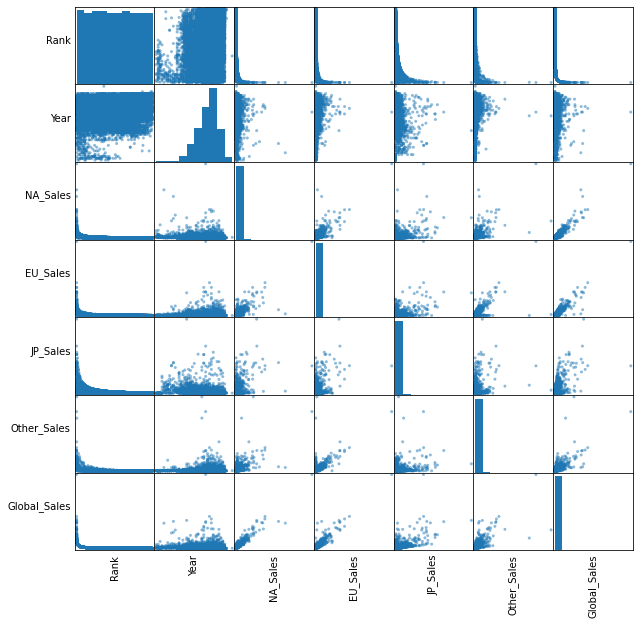

In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in df2.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df2.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
  v = axs[i, 0]
  v.yaxis.label.set_rotation(0)
  v.yaxis.label.set_ha('right')
  v.set_yticks(())
  h = axs[n-1, i]
  h.xaxis.label.set_rotation(90)
  h.set_xticks(())

In [17]:
import six
for i in df2.columns:
  if not( isinstance(df2.select(i).take(1)[0][0], six.string_types)):
    print( "Correlation to Employees for ", i, df2.stat.corr('Global_Sales',i))

Correlation to Employees for  Rank -0.42697487174026194
Correlation to Employees for  Year -0.07464690843583835
Correlation to Employees for  NA_Sales 0.9412692156419115
Correlation to Employees for  EU_Sales 0.9032637339929322
Correlation to Employees for  JP_Sales 0.6127741711194392
Correlation to Employees for  Other_Sales 0.7479639060045417
Correlation to Employees for  Global_Sales 1.0


In [18]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Rank', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], outputCol = 'features')
vgames_df = vectorAssembler.transform(df2)
vgames_df = vgames_df.select(['features', 'Global_Sales'])
vgames_df.show(3)

+--------------------+------------+
|            features|Global_Sales|
+--------------------+------------+
|[1.0,41.49,29.02,...|       82.74|
|[2.0,29.08,3.58,6...|       40.24|
|[3.0,15.85,12.88,...|       35.82|
+--------------------+------------+
only showing top 3 rows



In [19]:
splits = vgames_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [21]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Global_Sales', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))
print(lr_model.summary.r2)

Coefficients: [0.0,0.24891156093996042,0.09810474808677629,0.0,0.0,0.6018317035682041]
Intercept: 0.12945999457053398
0.9380745538625432


# Third file : GooglePlay

In [ ]:

ggplay = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("final_googlePlay.csv")

In [ ]:
dataset1 = ggplay.select(col('App'),
                         col('Category'),                        
                         col('Rating').cast('float'),
                         col('Reviews').cast('float'),
                         col('numberOfInstalls').cast('float'),
                         col('Type'),
                         col('price').cast('float'),
                         col('Genres')
                         
                        )
dataset1.show()

+--------------------+--------------+------+--------+----------------+----+-----+--------------------+
|                 App|      Category|Rating| Reviews|numberOfInstalls|Type|price|              Genres|
+--------------------+--------------+------+--------+----------------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|   159.0|            null|Free|  0.0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|   967.0|            null|Free|  0.0|Art & Design;Pret...|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7| 87510.0|            null|Free|  0.0|        Art & Design|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5|215644.0|            null|Free|  0.0|        Art & Design|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3|   967.0|            null|Free|  0.0|Art & Design;Crea...|
|Paper flowers ins...|ART_AND_DESIGN|   4.4|   167.0|            null|Free|  0.0|        Art & Design|
|Smoke Effect Phot...|ART_AND_DESIGN|   3.8|   178.0|            null|Fre

In [ ]:
bb=pd.read_csv('final_googlePlay.csv')
bb.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
numberOfInstalls    0
Type                0
price               0
Genres              0
dtype: int64

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Category", outputCol="categoryIndex")
indexed = indexer.fit(dataset1).transform(dataset1)
indexer1 = StringIndexer(inputCol="Type", outputCol="TypeIndex")
indexed1 = indexer1.fit(indexed).transform(indexed)
indexer2 = StringIndexer(inputCol="Genres", outputCol="GenresIndex")
indexed2 = indexer2.fit(indexed1).transform(indexed1)
final=indexed2.toPandas()
final.drop('Category', inplace=True, axis=1)
final.drop('Type',inplace=True, axis=1)
final.drop('Genres', inplace=True, axis=1)
final.drop('App', inplace=True, axis=1)
final.dropna(inplace=True)
final

,Rating,Reviews,numberOfInstalls,price,categoryIndex,TypeIndex,GenresIndex
589,4.4,28.0,500.0,0.0,17.0,0.0,19.0
592,4.7,6.0,100.0,0.0,17.0,0.0,19.0
594,2.7,3.0,100.0,0.0,17.0,0.0,19.0
597,5.0,2.0,100.0,0.0,17.0,0.0,19.0
598,4.8,20.0,500.0,0.0,17.0,0.0,19.0
...,...,...,...,...,...,...,...
9311,5.0,1.0,10.0,0.0,1.0,0.0,29.0
9337,4.3,3.0,100.0,0.0,9.0,0.0,10.0
9339,4.8,19.0,100.0,0.0,11.0,0.0,12.0
9353,4.0,7.0,500.0,0.0,0.0,0.0,2.0


In [ ]:
play = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("final1.csv")

In [ ]:
play.show(4)

+------+-------+----------------+-----+-------------+---------+-----------+
|Rating|Reviews|numberOfInstalls|price|categoryIndex|TypeIndex|GenresIndex|
+------+-------+----------------+-----+-------------+---------+-----------+
|   4.4|   28.0|           500.0|  0.0|         17.0|      0.0|       19.0|
|   4.7|    6.0|           100.0|  0.0|         17.0|      0.0|       19.0|
|   2.7|    3.0|           100.0|  0.0|         17.0|      0.0|       19.0|
|   5.0|    2.0|           100.0|  0.0|         17.0|      0.0|       19.0|
+------+-------+----------------+-----+-------------+---------+-----------+
only showing top 4 rows



In [ ]:
vectorAssembler = VectorAssembler(inputCols = ['Rating', 'Reviews','numberOfInstalls','price','categoryIndex','TypeIndex','GenresIndex'], outputCol = 'features')
gg_df = vectorAssembler.transform(play)
gg_df.show(5)
(training_data, test_data) = gg_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

+------+-------+----------------+-----+-------------+---------+-----------+--------------------+
|Rating|Reviews|numberOfInstalls|price|categoryIndex|TypeIndex|GenresIndex|            features|
+------+-------+----------------+-----+-------------+---------+-----------+--------------------+
|   4.4|   28.0|           500.0|  0.0|         17.0|      0.0|       19.0|[4.4,28.0,500.0,0...|
|   4.7|    6.0|           100.0|  0.0|         17.0|      0.0|       19.0|[4.7,6.0,100.0,0....|
|   2.7|    3.0|           100.0|  0.0|         17.0|      0.0|       19.0|[2.7,3.0,100.0,0....|
|   5.0|    2.0|           100.0|  0.0|         17.0|      0.0|       19.0|[5.0,2.0,100.0,0....|
|   4.8|   20.0|           500.0|  0.0|         17.0|      0.0|       19.0|[4.8,20.0,500.0,0...|
+------+-------+----------------+-----+-------------+---------+-----------+--------------------+
only showing top 5 rows

Training Dataset Count: 382
Test Dataset Count: 129


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='categoryIndex',featuresCol='features',
maxDepth=5)

In [ ]:
model = rf.fit(training_data)

In [ ]:
predictions = model.transform(test_data)

In [ ]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='categoryIndex', 
    predictionCol='prediction', 
    metricName='accuracy')


In [ ]:
#we to get the accuracy we do:
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy)

Test Accuracy =  0.7751937984496124
